# Аналіз динаміки ціни і обсягу торгів акціями компанії AirBnb

### Підготовка

**Імпортуємо бібліотеки**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


**Завантаження датасету**

In [2]:
df = pd.read_csv('abnb_stock_data.csv')

df['Date'] = pd.to_datetime(df['Date'])
df.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
dtype: object

**Виведення датасету, та загальної і статистичної інформації про нього**

In [3]:
print("Перші 5 рядків датасету:")
print(df.head())

print("\nЗагальна інформація про датасет:")
print(df.info())

numeric_columns = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']
summary_stats = df[numeric_columns].describe()
summary_stats

Перші 5 рядків датасету:
        Date        Open        High         Low       Close   Adj Close  \
0 2020-12-10  146.000000  165.000000  141.250000  144.710007  144.710007   
1 2020-12-11  146.550003  151.500000  135.100006  139.250000  139.250000   
2 2020-12-14  135.000000  135.300003  125.160004  130.000000  130.000000   
3 2020-12-15  126.690002  127.599998  121.500000  124.800003  124.800003   
4 2020-12-16  125.830002  142.000000  124.910004  137.990005  137.990005   

     Volume  
0  70447500  
1  26980800  
2  16966100  
3  10914400  
4  20409600  

Загальна інформація про датасет:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 809 entries, 0 to 808
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       809 non-null    datetime64[ns]
 1   Open       809 non-null    float64       
 2   High       809 non-null    float64       
 3   Low        809 non-null    float64       
 4   Close    

,Open,High,Low,Close,Adj Close,Volume
count,809.000000,809.000000,809.000000,809.000000,809.000000,8.090000e+02
mean,139.490291,142.570870,136.535424,139.619407,139.619407,6.489790e+06
std,28.325750,29.216124,27.395624,28.233642,28.233642,5.239688e+06
min,82.970001,84.250000,81.910004,82.489998,82.489998,1.995400e+06
25%,117.510002,119.699997,115.199997,117.110001,117.110001,4.090600e+06
50%,139.250000,141.539993,136.539993,139.419998,139.419998,5.189000e+06
75%,159.500000,164.699997,155.699997,160.250000,160.250000,7.136800e+06
max,216.240005,219.940002,209.089996,216.839996,216.839996,7.478640e+07


### Аналіз

**Візуалізуємо статистичні характеристики кожного стовпця через Box Plot**

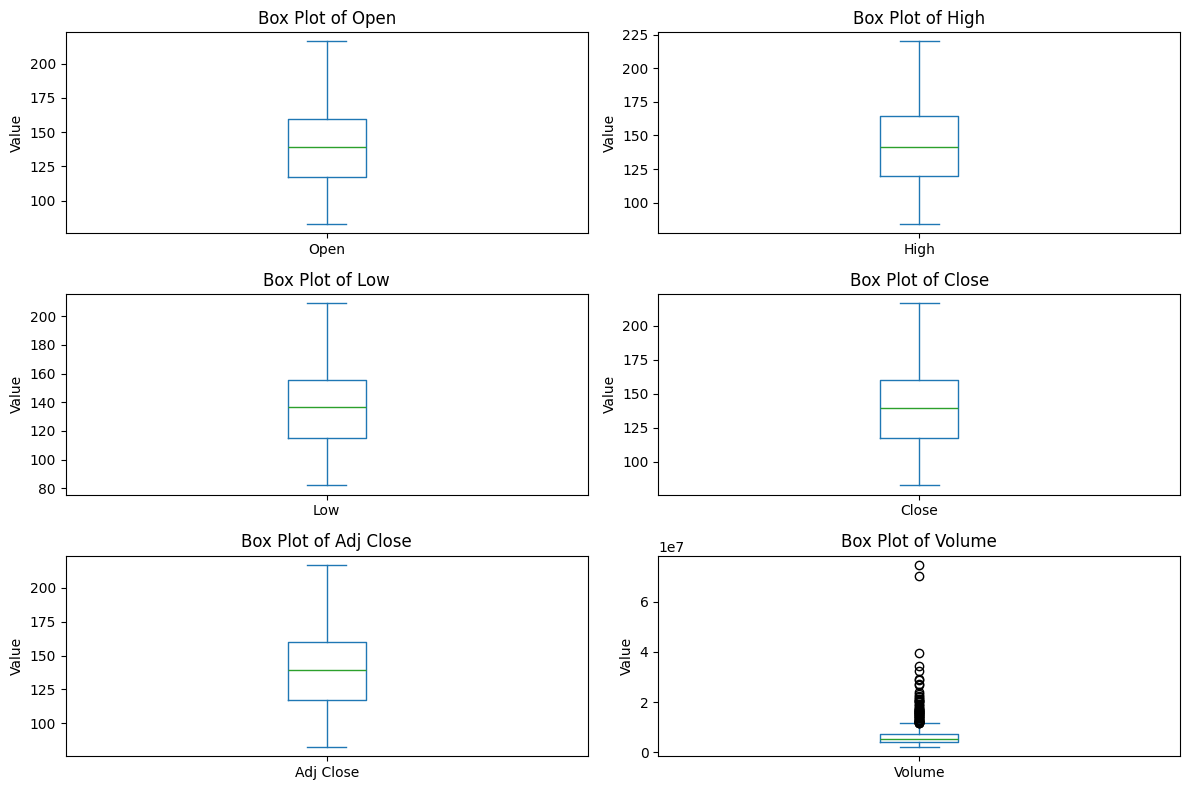

In [4]:
plt.figure(figsize=(12, 8))
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(3, 2, i)
    df[col].plot(kind='box')
    plt.title('Box Plot of ' + col)
    plt.ylabel('Value')
plt.tight_layout()
plt.show()

**Візуалізуємо графіки динаміки ціни на акції, та об'єму торгів**

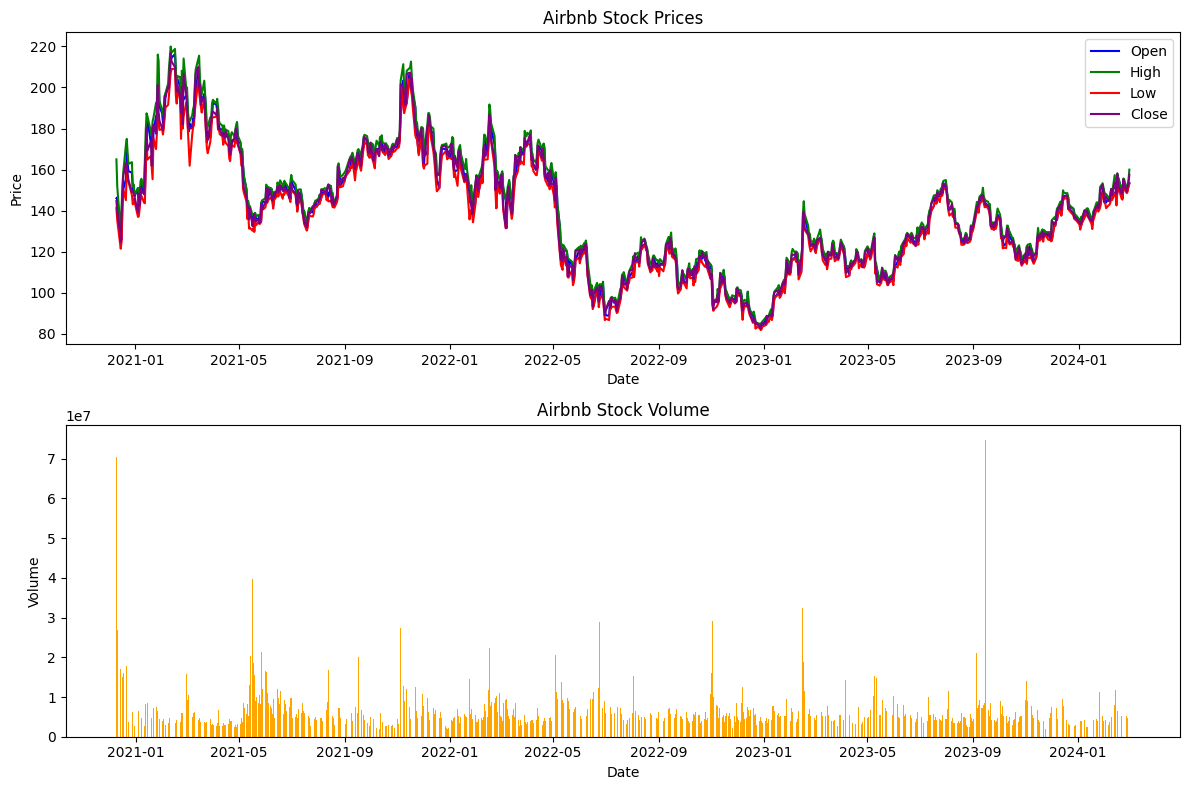

In [5]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 1, 1)
plt.plot(df['Date'], df['Open'], label='Open', color='blue')
plt.plot(df['Date'], df['High'], label='High', color='green')
plt.plot(df['Date'], df['Low'], label='Low', color='red')
plt.plot(df['Date'], df['Close'], label='Close', color='purple')
plt.title('Airbnb Stock Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()

plt.subplot(2, 1, 2)
plt.bar(df['Date'], df['Volume'], color='orange')
plt.title('Airbnb Stock Volume')
plt.xlabel('Date')
plt.ylabel('Volume')

plt.tight_layout()
plt.show()

**Дослідимо кореляцію між змінними**

In [6]:
correlation_matrix = df[numeric_columns].corr()
correlation_matrix

,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.994536,0.994632,0.988991,0.988991,-0.034390
High,0.994536,1.000000,0.992817,0.995026,0.995026,0.000997
Low,0.994632,0.992817,1.000000,0.994686,0.994686,-0.050254
Close,0.988991,0.995026,0.994686,1.000000,1.000000,-0.021681
Adj Close,0.988991,0.995026,0.994686,1.000000,1.000000,-0.021681
Volume,-0.034390,0.000997,-0.050254,-0.021681,-0.021681,1.000000


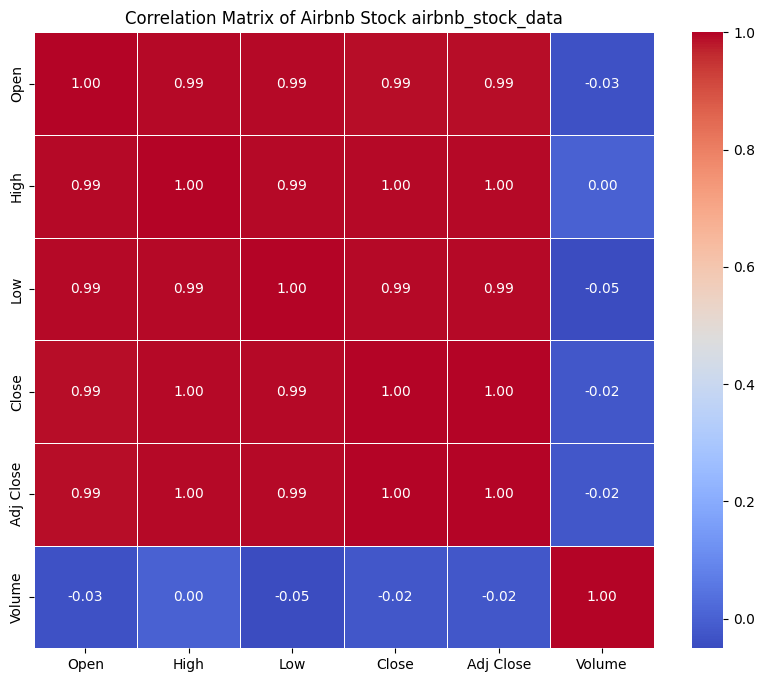

In [7]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Airbnb Stock airbnb_stock_data')
plt.show()

Text(0.5, 1.0, 'Open And Closing Relation')

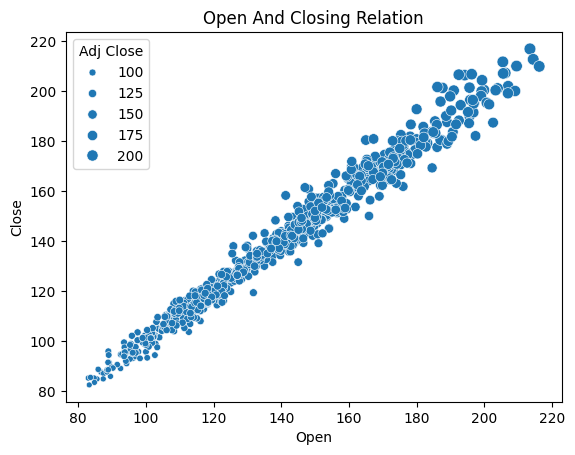

In [8]:
sns.scatterplot(df,x='Open',y='Close',size='Adj Close')
plt.title('Open And Closing Relation')

Text(0.5, 1.0, 'High and Low relation ')

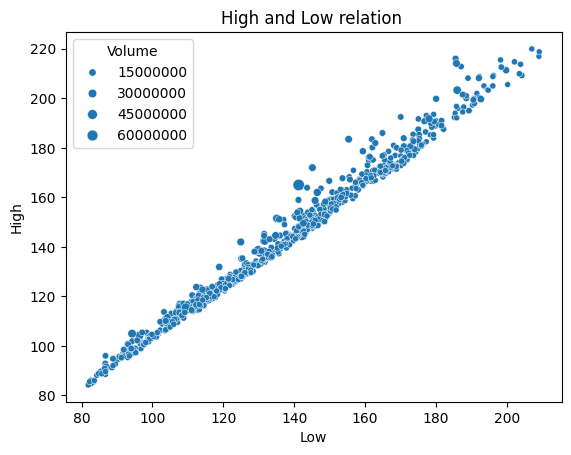

In [9]:
sns.scatterplot(df,x='Low',y='High',size ='Volume')
plt.title('High and Low relation ')

Значення 'Open', 'High', 'Low', 'Close' та 'Adj Close' високо корелюють між собою. Це очікувано, оскільки ці змінні представляють різні аспекти ціни акцій і, ймовірно, рухатимуться разом. Це можна побачити на вищенаведених графіках також. Коефіцієнти кореляції між цими ціновими змінними дуже близькі до 1, що свідчить про сильну позитивну кореляцію.

Коефіцієнти кореляції між обсягом торгів та ціновими змінними залишаються відносно низькими, що свідчить про слабкий лінійний зв'язок між обсягом торгів та ціною акцій. Кореляції близькі до нуля, що свідчить про те, що зміни в обсязі торгів не сильно пов'язані зі змінами цін судячи з інформації з даного датасету.

### Прогноз

**Підготовка даних для моделювання**

In [10]:
#Відбір колонок та встановлення індексу
selected_columns = ['Date', 'Close', 'Volume']
df = df[selected_columns]

df.set_index('Date', inplace=True)

# Розділимо дані на тренувальний та тестовий набори
train_size = int(len(df) * 0.8)
train_data = df.iloc[:train_size]
test_data = df.iloc[train_size:]

# Масштабуємо дані
scaler = MinMaxScaler(feature_range=(0, 1))
train_scaled = scaler.fit_transform(train_data)
test_scaled = scaler.transform(test_data)

# Функція для створення змінних за часом для моделювання
def create_sequences(data, sequence_length):
    X, y = [], []
    for i in range(len(data) - sequence_length):
        X.append(data[i:i+sequence_length])
        y.append(data[i+sequence_length])
    return np.array(X), np.array(y)

# Задамо довжину послідовності
sequence_length = 30

# Створимо змінні за часом для тренувального та тестового наборів
X_train, y_train = create_sequences(train_scaled, sequence_length)
X_test, y_test = create_sequences(test_scaled, sequence_length)

# Перевіримо розмірність отриманих змінних за часом
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (617, 30, 2)
y_train shape: (617, 2)
X_test shape: (132, 30, 2)
y_test shape: (132, 2)


**Створення та навчання моделі LSTM**

In [11]:
# Створимо модель LSTM
model = Sequential([
    LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.2),
    LSTM(units=50, return_sequences=True),
    Dropout(0.2),
    LSTM(units=50),
    Dropout(0.2),
    Dense(units=2)
])

# Компілюємо модель
model.compile(optimizer='adam', loss='mean_squared_error')

# Навчаємо модель
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1)

Epoch 1/50
18/18 [==============================] - 5s 70ms/step - loss: 0.0266 - val_loss: 0.0037
Epoch 2/50
18/18 [==============================] - 0s 20ms/step - loss: 0.0099 - val_loss: 0.0039
Epoch 3/50
18/18 [==============================] - 0s 20ms/step - loss: 0.0088 - val_loss: 0.0036
Epoch 4/50
18/18 [==============================] - 0s 18ms/step - loss: 0.0089 - val_loss: 0.0038
Epoch 5/50
18/18 [==============================] - 0s 20ms/step - loss: 0.0078 - val_loss: 0.0034
Epoch 6/50
18/18 [==============================] - 0s 20ms/step - loss: 0.0075 - val_loss: 0.0037
Epoch 7/50
18/18 [==============================] - 0s 19ms/step - loss: 0.0075 - val_loss: 0.0033
Epoch 8/50
18/18 [==============================] - 0s 21ms/step - loss: 0.0071 - val_loss: 0.0037
Epoch 9/50
18/18 [==============================] - 0s 19ms/step - loss: 0.0069 - val_loss: 0.0031
Epoch 10/50
18/18 [==============================] - 0s 19ms/step - loss: 0.0071 - val_loss: 0.0030
Epoch 11/

**Оцінка якості моделі та візуалізація прогнозів**

5/5 [==============================] - 0s 7ms/step - loss: 0.0056
Test Loss: 0.0055535021238029
5/5 [==============================] - 1s 5ms/step


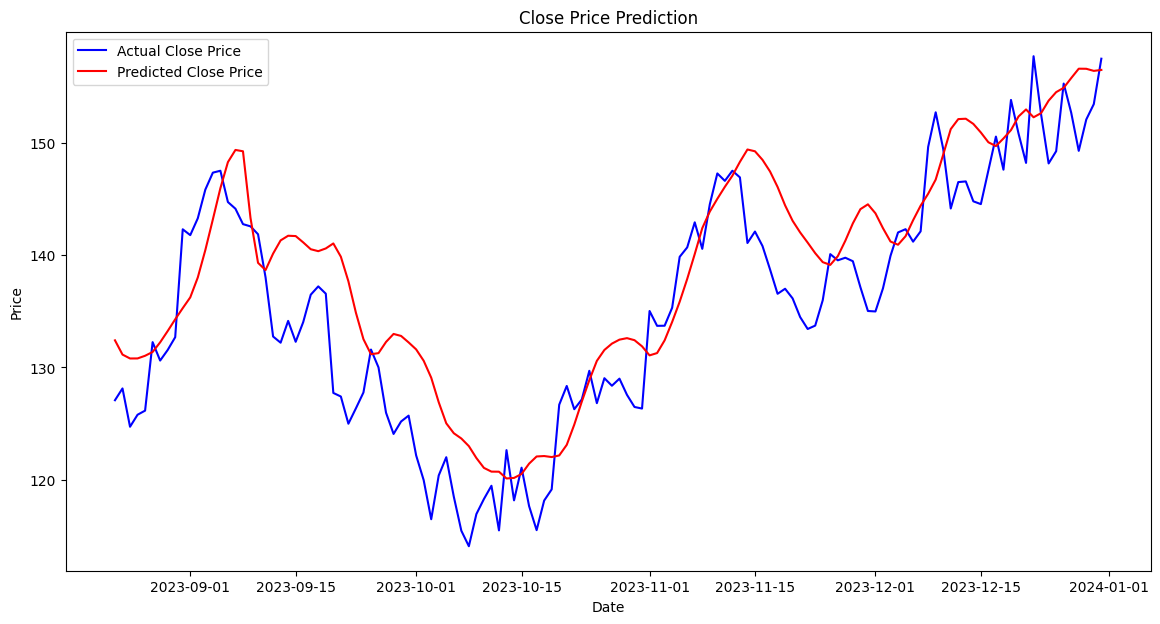

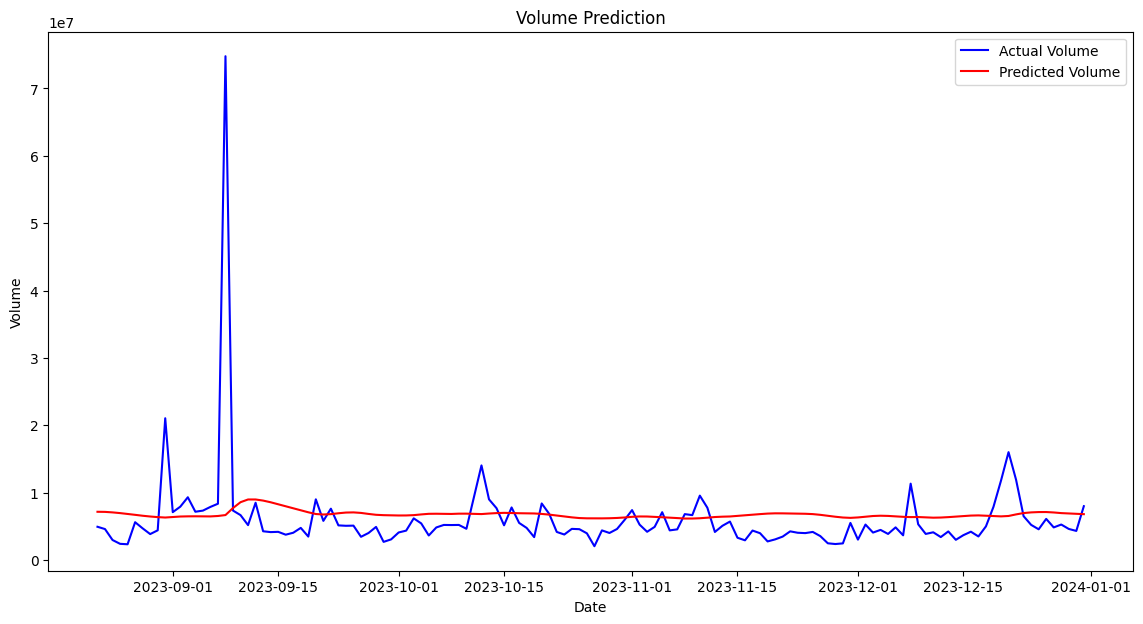

In [12]:
# Оцінимо якість моделі на тестовому наборі
loss = model.evaluate(X_test, y_test)
print("Test Loss:", loss)

# Отримаємо початкову дату тестового періоду
start_date = df.index[train_size + sequence_length]

# Зробимо прогнози
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)
y_test_original = scaler.inverse_transform(y_test)

dates = pd.date_range(start=start_date, periods=len(predictions))

# Візуалізуємо прогнози
plt.figure(figsize=(14, 7))
plt.plot(dates, y_test_original[:,0], label='Actual Close Price', color='blue')
plt.plot(dates, predictions[:,0], label='Predicted Close Price', color='red')
plt.title('Close Price Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

plt.figure(figsize=(14, 7))
plt.plot(dates, y_test_original[:,1], label='Actual Volume', color='blue')
plt.plot(dates, predictions[:,1], label='Predicted Volume', color='red')
plt.title('Volume Prediction')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.show()

На основі результатів прогнозування за допомогою моделі LSTM можна зробити такі висновки:

1. **Якість моделі**: Оцінка якості моделі показала Test Loss: 0.0056, що є прийнятним рівнем втрат.
2. **Прогноз ціни закриття**: Графік прогнозованих та фактичних значень ціни закриття показує, що модель в цілому непогано відтворює тенденції руху ціни, хоча можливі деякі відхилення.
3. **Прогноз обсягу торгів**: Графік прогнозованого та фактичного обсягу торгів також відображає деяку відповідність між прогнозами та фактичними значеннями, але може бути деяка розбіжність у пікових значеннях.

Загалом, модель LSTM показала досить непогані результати прогнозування ціни закриття та обсягу торгів акціями. Однак перед використанням її в реальних умовах, рекомендується провести додатковий аналіз та налаштування моделі для забезпечення кращої точності прогнозів.